In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# x_train = np.array([1.0,2.0])
# y_train = np.array([300.0, 500.0])
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730])

In [105]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost=0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = (1/2*m)*cost
    return total_cost

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


In [108]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb = w * x[i] + b
        tmp_dj_dw = (f_wb - y[i])*x[i]
        tmp_dj_db = (f_wb - y[i])
        dj_dw += tmp_dj_dw
        dj_db += tmp_dj_db
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db


$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [111]:
def gradient_decent(x,y,w_in,b_in,alpha,num_iter,cost_function,gradient_function):
    w = w_in
    b = b_in
    for i in range(num_iter):
        dj_dw,dj_db = gradient_function(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w,b
    

In [113]:
w_init=0
b_init=0
iterations=10000
tmp_alpha = 1.0e-2
w_final,b_final = gradient_decent(x_train,y_train,w_init,b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient decent: ({w_final}, {b_final})")

(w,b) found by gradient decent: (209.3589503186303, 2.4325457728079756)


In [116]:
predict_value = np.zeros(len(y_train))
for i in range(len(predict_value)):
    predict_value[i] = w_final * x_train[i] + b_final
print(f"Predicated Values are: {predict_value}")

Predicated Values are: [211.79149609 358.34276131 421.15044641 525.82992157 630.50939673
 672.38118679]


In [118]:

# def house_price(size,w,b):
#     return f"{size} sqft hosue prediction is: {w*(size/1000)+b:0.2f} thousand dollars"

In [120]:
# size = int(input("Enter the size of house: "))
# house_price(size, w_final, b_final)

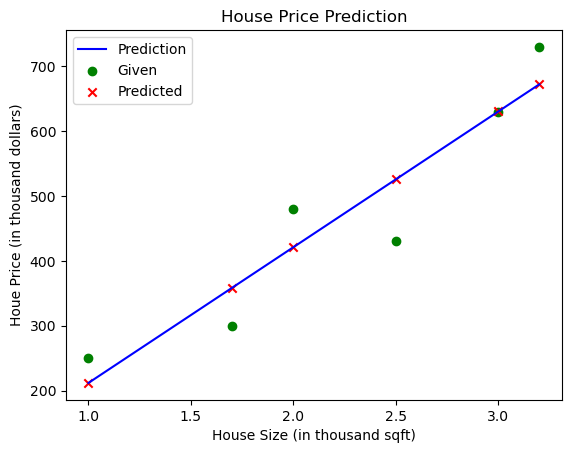

In [124]:
plt.plot(x_train, predict_value,c='b', label = "Prediction")
plt.scatter(x_train, y_train, c='g', marker='o', label='Given')
plt.scatter(x_train, predict_value, c='r', marker='x', label='Predicted')
plt.title("House Price Prediction")
plt.xlabel("House Size (in thousand sqft)")
plt.ylabel("Houe Price (in thousand dollars)")
plt.legend()